# **3.4 - É Magia E Nanotecnologia 🔮🔬**
**Objetivo**:  Se informe sobre métodos dunder que não foram utilizados no material de aula e crie uma classe que contenha pelo menos 3 destes métodos dunder. Faça códigos onde cada um destes métodos dunder seja acessado sem os chamar explicitamente (exemplo: não é para rodar a.__ add __(b) mas sim a + b para o caso do dunder __ add __).
***

### **Introdução** 💡

<p style="text-align: justify;">
Uma das principais áreas emergentes da ciência é a nanotecnologia, a qual consiste no estudo de materiais na dimensão de 1 a 100 nanômetros. Esses compostos, em decorrência do aumento entre a razão superfície e volume, são mais reativos do que os materiais de mesma composição na escala <em>bulk</em> (ou larga dimensão)- podendo ser utilizados em uma variedade de reações -, e apresentam propriedades físicas e químicas distintas. Em razão disso, os nanomateriais vem sendo amplamente aplicados nas últimas décadas para os mais diversos fins, como produção de fármacos, armazenamento de energia, produção de reações catalíticas e eletrônica. [1]
</p>

<p style="text-align: justify;">
Nesse contexto, uma das principais práticas realizadas ao longo da disciplina de Práticas Básicas de Laboratório (PBL) - uma disciplina presente no primeiro semestre do bacharelado em ciência e tecnologia da Ilum (BCT) - consiste na síntese de nanopartículas metálicas. Para a análise dos materiais obtidos, diversas técnicas de caracterização são aplicadas para o entendimento das propriedades por diferentes perspectivas. Dentre as principais, destacam-se o Espalhamento de Luz Dinâmico (DLS), Espectrofotômetro de Luz Visível (UV - vis) e espectrofluorímetro. O funcionamento de cada uma dessas técnicas pode ser melhor compreendido pela leitura da referência 1. 
</p>

<p style="text-align: justify;">
Vale ressaltar que, dependendo do material sintetizado, os resultados esperados para cada caracterização encontram-se presentes na literatura. No entanto, temos que a síntese de nanomateriais é complexa, podendo ser afetada por diversos fatores. Logo, a obtenção desses resultados não é algo trivial e, geralmente, nas aulas de PBL esses não são completamente alcançados.
</p>

<p style="text-align:justify">
Nesse viés, esse trabalho visa automatizar o processo de comparação entre os resultados esperados e os resultados obtidos pelos alunos. Para isso, os dados utilizados serão sintéticos (criados por meio da utilização da biblioteca Random) e as comparações serão realizadas por meio da classe "ComparaCaracterizacao". Essa, por sua vez, será composta apenas por métodos <em>dunder</em> (também conhecidos como métodos mágucos), os quais, são métodos especiais do Python, que podem exercer interações diferentes das realizadas por métodos convencionais (criados pelo próprio usuário).

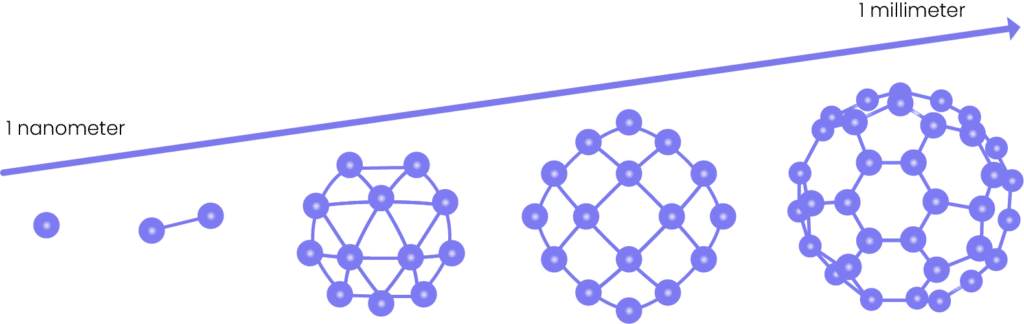

<p style="text-align: center;">
    Figura 1: Escala de uma nanopartícula
</p>

### **Importação de Bibliotecas** 📚

In [4]:
import pandas as pd
import random 

### **Criação dos dados artificiais** 📝

Utilizando a função "randint" da biblioteca "random", foi possível criar dados artificiais, os quais simulam os resultados obtidos por 10 alunos em três diferentes tipos de caracterizações (DLS, Uv-vis e Espectrofluorímetro). Vale ressaltar que os resultados não possuem qualquer relação com os esperados para uma síntese existente.

In [5]:
random.seed(2020)
df = pd.DataFrame({
    "DLS (nm)": [random.randint(10, 150) for i in range(10)],
    "UV- vis: Pico de Absorção (nm)": [random.randint(400, 450) for i in range(10)],
    "Espectrofluorímetro: Pico de emissão (nm)": [random.randint(500, 550) for i in range(10)]
})
display(df)

,DLS (nm),UV- vis: Pico de Absorção (nm),Espectrofluorímetro: Pico de emissão (nm)
0,54,415,545
1,128,413,542
2,123,426,510
3,131,442,531
4,104,413,539
5,117,438,534
6,149,409,547
7,50,430,530
8,33,428,502
9,127,406,528


### **Classe "ComparaCaracterizacao"** 🧪

A classe "ComparaCaracterizacao" inicializa uma instância com um resultado base para a caracterização, o qual contém uma string com o tipo de caracterização realizado, o resultado esperado para a determinada caracterização - que pode ser um inteiro/float ou tupla/lista (com dois valores, representando um intervalo) -, e a unidade de medida na qual o resultado é dado. A partir disso, é possível utilizar os métodos dunder de comparação estabelecidos (__eq __, __ne __, __le __, __ge __) para comparar essa instância com os valores obtidos pelos alunos.

In [6]:
class ComparaCaracterizacao:
    def __init__(self, caracterizacao, resultado_esperado, unidade_medida):
        """Inicialização da instância, com a caracterização base

        Args:
        caracterizacao: string com o tipo de caracterização escolhida
        resultado_esperado: resultado esperado para a caracterização (inteiro ou float)
        unidade_medida: string que representa a unidade de medida na qual o resultado da caracterização é dada  (Ex: "nm")
        """

        if not isinstance(resultado_esperado, (int, float, tuple, list)):
            raise TypeError("O resultado esperado deve ser um número (int ou float) ou um intervalo (tupla ou lista de dois elementos)!.")
        
        if isinstance(resultado_esperado, (tuple, list)) and len(resultado_esperado) != 2:
            raise ValueError("Se for um intervalo, o resultado esperado deve conter exatamente dois valores!.")

        self.caracterizacao = caracterizacao
        self.resultado_esperado = resultado_esperado
        self.unidade_medida = unidade_medida     

    def __repr__(self):
        "Representação da instância criada"

        if isinstance(self.resultado_esperado, (list, tuple)):
            return f"A caracterização escolhida foi {self.caracterizacao}, sendo o resultado base entre  {self.resultado_esperado[0]} e {self.resultado_esperado[1]} {self.unidade_medida}."
        else:
            return f"A caracterização escolhida foi {self.caracterizacao}, sendo o resultado base {self.resultado_esperado} {self.unidade_medida}."

    def __eq__(self, resultado_comparacao):
        """Compara se o resultado obtido é exatamente igual (no caso de um inteiro ou float como resultado base) ou se um número está dentro de um intervalo esperado (no caso de uma tupla ou lista como resultado base).
        
        Args:
        resultado_comparacao: inteiro ou float que representa o resultado obtido na caracterização 
        """

        if not isinstance(resultado_comparacao, (int, float)):
            raise TypeError("O resultado para comparação deve ser um número (int ou float).")

        if isinstance(self.resultado_esperado, (int, float)) and isinstance(resultado_comparacao, (int, float)):
            return self.resultado_esperado == resultado_comparacao
        
        
        elif isinstance(self.resultado_esperado, (tuple, list)) and isinstance(resultado_comparacao, (int, float)):
            return self.resultado_esperado[0] <= resultado_comparacao <= self.resultado_esperado[1]
        

    def __ne__(self, resultado_comparacao):
        """Retorna True se os valores não forem iguais ou se o número não estiver no intervalo.
        Args:
        resultado_comparacao: inteiro ou float que representa o resultado obtido na caracterização
        """

        if not isinstance(resultado_comparacao, (int, float)):
            raise TypeError("O resultado para comparação deve ser um número (int ou float).")
        
        return not self.__eq__(resultado_comparacao)

    def __le__(self, resultado_comparacao):
        """Verifica se o valor esperado é menor ou igual ao valor comparado.
        Args:
        resultado_comparacao: inteiro ou float que representa o resultado obtido na caracterização
        """

        if not isinstance(resultado_comparacao, (int, float)):
            raise TypeError("O resultado para comparação deve ser um número (int ou float).")
        
        if isinstance(self.resultado_esperado, (int, float)) and isinstance(resultado_comparacao, (int, float)):
            return self.resultado_esperado <= resultado_comparacao
        
        elif isinstance(self.resultado_esperado, (tuple, list)) and isinstance(resultado_comparacao, (int, float)):
            return self.resultado_esperado[1] <= resultado_comparacao 

    def __ge__(self, resultado_comparacao):
        """Verifica se o valor esperado é maior ou igual ao valor comparado.
        Args:
        resultado_comparacao: inteiro ou float que representa o resultado obtido na caracterização
        """
        
        if not isinstance(resultado_comparacao, (int, float)):
            raise TypeError("O resultado para comparação deve ser um número (int ou float).")
        
        if isinstance(self.resultado_esperado, (int, float)) and isinstance(resultado_comparacao, (int, float)):
            return self.resultado_esperado >= resultado_comparacao
        
        elif isinstance(self.resultado_esperado, (tuple, list)) and isinstance(resultado_comparacao, (int, float)):
            return self.resultado_esperado[0] >= resultado_comparacao  
        

Em primeiro lugar, é possível testar a classe utilizando como base os resultado de DLS. Para o teste em questão, irei inicializar uma instância base e comparar essa com o resultado obtido por cada aluno. Considerando que o trabalho dos alunos era sintetizar nanopartículas, espera-se que os resultados possuam entre 1 e 100 nm.

In [7]:
resultado_base_dls = ComparaCaracterizacao("DLS", [1, 100], "nm")

In [8]:
resultado_base_dls

A caracterização escolhida foi DLS, sendo o resultado base entre  1 e 100 nm.

In [9]:
count = 1
for resultado_aluno in df["DLS (nm)"]:
    if resultado_aluno == resultado_base_dls:
        print(f"O aluno {count} conseguiu obter nanopartículas!")
    else:
        print(f"O aluno {count} conseguiu não obter nanopartículas :(")
    count +=1

O aluno 1 conseguiu obter nanopartículas!
O aluno 2 conseguiu não obter nanopartículas :(
O aluno 3 conseguiu não obter nanopartículas :(
O aluno 4 conseguiu não obter nanopartículas :(
O aluno 5 conseguiu não obter nanopartículas :(
O aluno 6 conseguiu não obter nanopartículas :(
O aluno 7 conseguiu não obter nanopartículas :(
O aluno 8 conseguiu obter nanopartículas!
O aluno 9 conseguiu obter nanopartículas!
O aluno 10 conseguiu não obter nanopartículas :(


Ou seja, foi possível concluir que apenas 3 alunos obtiveram partículas no tamanho esperado (Uma sala repleta de teóricos, provavelmente). Considerando que o intervalo inicia-se em 1 nm (muito pequeno!), provavelmente os alunos sintetizaram partículas maiores. Para confirmar podemos utilizar o método __le __ ou método __ge __, os quais verificam, respectivamente, se os valores são menores ou maiores do que o esperado (ou iguais). A fim de testar esses métodos, podemos utilizar o resultado de um aluno qualquer.

In [10]:
if df["DLS (nm)"][1] >= resultado_base_dls:
    print("As nanopartículas do aluno 2 são maiores ou iguais ao resultado esperado!")
else:
    print("As nanopartículas do aluno 2 são menores do que o esperado!")

As nanopartículas do aluno 2 são maiores ou iguais ao resultado esperado!


In [11]:
if df["DLS (nm)"][1] <= resultado_base_dls:
    print("As nanopartículas do aluno 2 são menores ou iguais ao resultado esperado!")
else:
    print("As nanopartículas do aluno 2 são maiores do que o esperado!")

As nanopartículas do aluno 2 são maiores do que o esperado!


Nesse contexto, temos que as funções poderiam ser utilizadas de forma muito semelhante (apenas teríamos como diferença o fato de que, em caso de retorno True, o resultado poderia ser igual ao limite estabelecido, ou seja, usando o operador ">=", o resultado poderia ser igual a 1 nm, mas usando o operador ">=", necessariamente o resultado obtido precisaria ser maior do que 1 nm. A utilização dos métodos dunder __lt __ e __gt __, que excluem essa possibilidade de igualdade, poderiam resolver esse problema).

Para o espectro de absorção, temos que esse, na situação simulada, precisaria ser exatamente igual a 450 nm. Para testar se isso realmente ocorreu, além da inicialização da instância referente ao resultado base dessa caracterização, seria possível utilizar o método dunder __ne __, que verifica desigualdade.

In [12]:
resultado_base_uv_vis= ComparaCaracterizacao("UV - vis", 450, "nm")

In [13]:
resultado_base_uv_vis

A caracterização escolhida foi UV - vis, sendo o resultado base 450 nm.

In [15]:
count = 1
for resultado_aluno in df["UV- vis: Pico de Absorção (nm)"]:
    if resultado_aluno != resultado_base_dls:
        print(f"O aluno {count} não conseguiu obter o pico de absorção desejado :(")
    else:
        print(f"O aluno {count} conseguiu obter o pico de absorção desejado!")
    count +=1

O aluno 1 não conseguiu obter o pico de absorção desejado :(
O aluno 2 não conseguiu obter o pico de absorção desejado :(
O aluno 3 não conseguiu obter o pico de absorção desejado :(
O aluno 4 não conseguiu obter o pico de absorção desejado :(
O aluno 5 não conseguiu obter o pico de absorção desejado :(
O aluno 6 não conseguiu obter o pico de absorção desejado :(
O aluno 7 não conseguiu obter o pico de absorção desejado :(
O aluno 8 não conseguiu obter o pico de absorção desejado :(
O aluno 9 não conseguiu obter o pico de absorção desejado :(
O aluno 10 não conseguiu obter o pico de absorção desejado :(


Ao final, temos que nenhum aluno conseguiu obter exatamente o pico de absorção desejado :( 

### **Conclusão** 🧪

<p style="text-align: justify;">
Utilizando exclusivamente métodos dunder, foi possível desenvolver uma classe capaz de comparar os resultados de caracterizações com um resultado base, inicializado como uma instância da classe "ComparaCaracterizacao". Por meio dessa tarefa, foi possível compreender de forma mais abrangente o funcionamento dos métodos dunder. Apesar desses executarem, de maneira geral, tarefas mais simples, a customização desses métodos pode ser de grande auxílio para a execução de tarefas fundamentais para a composição de uma classe. Por exemplo, ao modificar o comportamento do método __eq __, foi possível utilizá-lo para verificar se um valor pertence a um determinado intervalo, em vez de apenas comparar dois valores diretamente, como é usual. 
</p>

### **Referências 🗃️**

[1] JOUDEH, Nadeem; LINKE, Dirk. Nanoparticle classification, physicochemical properties, characterization, and applications: a comprehensive review for biologists. Journal of Nanobiotechnology, v. 20, n. 1, p. 262, 2022. Disponível em: <https://doi.org/10.1186/s12951-022-01477-8>. Acesso em: 23 mar. 2025.

[2] Nanoparticle Definition, Size, and Applications. Phoreus Biotech. Disponível em: <https://phoreusbiotech.com/drug-delivery/nanoparticles/>. Acesso em: 23 mar. 2025.

[3] HUNNER, Trey. Every dunder method in Python - Python Morsels. Disponível em: <https://www.pythonmorsels.com/every-dunder-method/>. Acesso em: 23 mar. 2025.
